In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

## 1. Read UTMB data

In [32]:
utmb_data= pd.read_csv("compare.csv")[["Portien","rateconst"]]
utmb_list= pd.read_csv("Protein_List.utmb.0311_2022.csv")[["Entry","Entry name","Gene names"]]
utmb_data=utmb_data.merge(utmb_list,left_on=["Portien"],right_on=["Entry name"])[["Entry","Entry name",
                                                                                  "rateconst","Gene names"]]
utmb_data["Gene names"]=[(str(x).strip().split(' ')[0]).strip() for x in utmb_data["Gene names"]]
utmb_data["utmb_HL"]=[ math.log(2)/x if x>0 else None for x in utmb_data["rateconst"] ]
print(utmb_data.shape)
utmb_data.head()

(1786, 5)


,Entry,Entry name,rateconst,Gene names,utmb_HL
0,Q9CQV8,1433B_MOUSE,0.309584,Ywhab,2.238963
1,P62259,1433E_MOUSE,0.299214,Ywhae,2.316560
2,P68510,1433F_MOUSE,0.379755,Ywhah,1.825248
3,P61982,1433G_MOUSE,0.373152,Ywhag,1.857546
4,P68254,1433T_MOUSE,0.557099,Ywhaq,1.244208


## 2. Read mRNA half life data

In [33]:
mrna_data=pd.read_excel("mRNA_Half_Lives_pnas.1715225115.sd01.xlsx",sheet_name="Sheet2")[["gene",'half.life', 'cv.half.life']]
mrna_data["gene"]=[ str(x).strip() for x in mrna_data["gene"]]
# mrna_data["mRNA_k"]=[math.log(2)/x for x in mrna_data["half.life"]]
# mrna_data=mrna_data.dropna()
print(mrna_data.shape)
mrna_data.head()

(12216, 3)


,gene,half.life,cv.half.life
0,Gnai3,NaN,NaN
1,Cdc45,0.166667,5.277888
2,Apoh,9.192603,0.738041
3,Narf,1.446211,0.159744
4,Cav2,NaN,NaN


## 3. Merge mrna & utmb data

In [34]:
data=mrna_data.merge(utmb_data, left_on='gene', right_on='Gene names',how='right')
data=data[['gene', 'Entry', 'Entry name', 'Gene names', 'utmb_HL','half.life', 'cv.half.life', 'rateconst']]
print(data.shape)
data.head()

(1786, 8)


,gene,Entry,Entry name,Gene names,utmb_HL,half.life,cv.half.life,rateconst
0,Ywhab,Q9CQV8,1433B_MOUSE,Ywhab,2.238963,NaN,NaN,0.309584
1,Ywhae,P62259,1433E_MOUSE,Ywhae,2.316560,NaN,NaN,0.299214
2,Ywhah,P68510,1433F_MOUSE,Ywhah,1.825248,0.166667,2.774646,0.379755
3,Ywhag,P61982,1433G_MOUSE,Ywhag,1.857546,0.166667,2.590179,0.373152
4,Ywhaq,P68254,1433T_MOUSE,Ywhaq,1.244208,NaN,NaN,0.557099


In [35]:
data.sort_values(by=['gene'])
data[pd.isna(data["gene"])]

,gene,Entry,Entry name,Gene names,utmb_HL,half.life,cv.half.life,rateconst
9,NaN,Q61767,3BHS4_MOUSE,Hsd3b4,5.403898,NaN,NaN,0.128268
40,NaN,Q8K4F5,ABHDB_MOUSE,Abhd11,194.050163,NaN,NaN,0.003572
74,NaN,Q8BFZ3,ACTBL_MOUSE,Actbl2,3.297403,NaN,NaN,0.210210
76,NaN,P68033,ACTC_MOUSE,Actc1,4.486767,NaN,NaN,0.154487
89,NaN,P48962,ADT1_MOUSE,Slc25a4,3.954988,NaN,NaN,0.175259
...,...,...,...,...,...,...,...,...
1705,NaN,Q921I1,TRFE_MOUSE,Tf,0.586910,NaN,NaN,1.181012
1738,NaN,Q64435,UD16_MOUSE,Ugt1a6,2.700086,NaN,NaN,0.256713
1743,NaN,P17717,UDB17_MOUSE,Ugt2b17,1.532986,NaN,NaN,0.452155
1744,NaN,P70362,UFD1_MOUSE,Ufd1,1.207952,NaN,NaN,0.573820


In [36]:
data[data['utmb_HL']>500]

,gene,Entry,Entry name,Gene names,utmb_HL,half.life,cv.half.life,rateconst
38,Abcg2,Q7TMS5,ABCG2_MOUSE,Abcg2,5776.226505,0.559645,0.749604,0.000120
145,Ap1g1,P22892,AP1G1_MOUSE,Ap1g1,2605.816468,2.763107,0.567441,0.000266
256,Capn2,O08529,CAN2_MOUSE,Capn2,751.786530,0.166667,1.288338,0.000922
317,Col6a2,Q02788,CO6A2_MOUSE,Col6a2,1426.228767,NaN,NaN,0.000486
742,NaN,P84228,H32_MOUSE,H3c2,1264.867118,NaN,NaN,0.000548
866,NaN,Q922U2,K2C5_MOUSE,Krt5,5022.805656,NaN,NaN,0.000138
1216,Ppp1cb,P62141,PP1B_MOUSE,Ppp1cb,1325.329217,NaN,NaN,0.000523
1290,Ptgr2,Q8VDQ1,PTGR2_MOUSE,Ptgr2,682.903626,11.620970,0.434004,0.001015


## 4. clean up

Text(0, 0.5, 'UTMB')

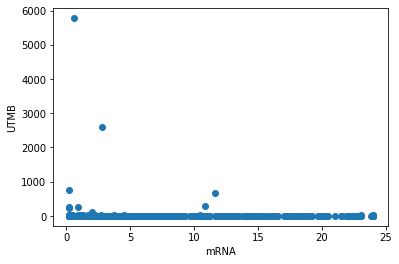

In [37]:
plt.scatter(data["half.life"], data["utmb_HL"])
plt.xlabel("mRNA")
plt.ylabel("UTMB")

In [38]:
data=data.dropna()
data=data[data["half.life"]!=0.166666666666667 ]
data=data[data["cv.half.life"]<2]
data=data[data["utmb_HL"]<100]
data=data.sort_values(by=["utmb_HL"])
data.head(15)

,gene,Entry,Entry name,Gene names,utmb_HL,half.life,cv.half.life,rateconst
159,Apoe,P08226,APOE_MOUSE,Apoe,0.078542,0.736282,1.733502,8.825160
1625,Tdo2,P48776,T23O_MOUSE,Tdo2,0.081773,2.629887,0.386123,8.476446
597,Fads2,Q9Z0R9,FADS2_MOUSE,Fads2,0.083068,1.566399,0.292128,8.344342
1012,Mup20,Q5FW60,MUP20_MOUSE,Mup20,0.113351,1.984450,0.242061,6.115034
795,Hrg,Q9ESB3,HRG_MOUSE,Hrg,0.116357,3.417963,0.411979,5.957098
312,C3,P01027,CO3_MOUSE,C3,0.126107,15.320379,0.194065,5.496514
1759,Vat1,Q62465,VAT1_MOUSE,Vat1,0.137186,3.519414,0.487855,5.052592
744,H2-D1,P01899,HA11_MOUSE,H2-D1,0.138339,0.848745,0.778327,5.010497
318,C8g,Q8VCG4,CO8G_MOUSE,C8g,0.143725,2.484690,0.326364,4.822731
891,Lamp2,P17047,LAMP2_MOUSE,Lamp2,0.160395,5.990647,0.262963,4.321505


Text(0, 0.5, 'UTMB')

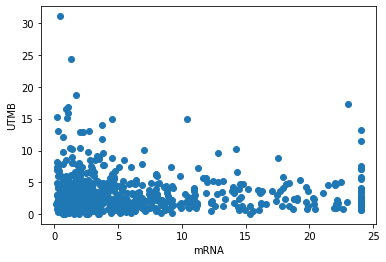

In [39]:
plt.scatter(data["half.life"], data["utmb_HL"])
plt.xlabel("mRNA")
plt.ylabel("UTMB")

array([[<AxesSubplot:title={'center':'half.life'}>,
        <AxesSubplot:title={'center':'utmb_HL'}>]], dtype=object)

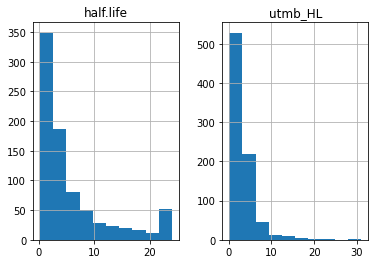

In [40]:
data[["half.life","utmb_HL"]].hist()